In [ ]:
!python -m pip install pyyaml==5.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 29.2 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=a50b6c3f002b4a520b203be92a3858d605d4b92533890056546ddcb31133880c
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-j92yncz6
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-j92yncz6
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 79 kB

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
torch:  1.12 ; cuda:  cu113
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("deepfashion_train", {}, "/content/drive/MyDrive/PHD/Internships/Pittsburg University - Xing Lab/Collab_datatrain.json","/content/drive/MyDrive/PHD/Internships/Pittsburg University - Xing Lab/Collab_data/data")
register_coco_instances("deepfashion_val", {}, "/content/drive/MyDrive/PHD/Internships/Pittsburg University - Xing Lab/Collab_dataval.json","/content/drive/MyDrive/PHD/Internships/Pittsburg University - Xing Lab/Collab_data/data")

In [ ]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("deepfashion_val",)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 300
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13

cfg.TEST.EVAL_PERIOD = 500

In [ ]:
import torch
print(torch.version)
print(torch.cuda.is_available())

<module 'torch.version' from '/usr/local/lib/python3.7/dist-packages/torch/version.py'>
True


In [ ]:
! add-apt-repository ppa:graphics-drivers/ppa
! apt update
! apt install nvidia-384 nvidia-384-dev
! apt-get install g++ freeglut3-dev build-essential libx11-dev libxmu-dev libxi-dev libglu1-mesa libglu1-mesa-dev

 Fresh drivers from upstream, currently shipping Nvidia.

## Current Status

Current long-lived branch release: `nvidia-430` (430.40)
Dropped support for Fermi series (https://nvidia.custhelp.com/app/answers/detail/a_id/4656)

Old long-lived branch release: `nvidia-390` (390.129)

For GF1xx GPUs use `nvidia-390` (390.129)
For G8x, G9x and GT2xx GPUs use `nvidia-340` (340.107)
For NV4x and G7x GPUs use `nvidia-304` (304.137) End-Of-Life!

Support timeframes for Unix legacy GPU releases:
https://nvidia.custhelp.com/app/answers/detail/a_id/3142

## What we're working on right now:

- Normal driver updates
- Help Wanted: Mesa Updates for Intel/AMD users, ping us if you want to help do this work, we're shorthanded.

## WARNINGS:

This PPA is currently in testing, you should be experienced with packaging before you dive in here:

Volunteers welcome!

### How you can help:

## Install PTS and benchmark your gear:

    sudo apt-get install phoronix-test-suite

Run the benchmark:

    phoronix-

In [ ]:
!gcc -v

Using built-in specs.
COLLECT_GCC=gcc
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/7/lto-wrapper
OFFLOAD_TARGET_NAMES=nvptx-none
OFFLOAD_TARGET_DEFAULT=1
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 7.5.0-3ubuntu1~18.04' --with-bugurl=file:///usr/share/doc/gcc-7/README.Bugs --enable-languages=c,ada,c++,go,brig,d,fortran,objc,obj-c++ --prefix=/usr --with-gcc-major-version-only --program-suffix=-7 --program-prefix=x86_64-linux-gnu- --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --enable-bootstrap --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx-abi=new --enable-gnu-unique-object --disable-vtable-verify --enable-libmpx --enable-plugin --enable-default-pie --with-system-zlib --with-target-system-zlib --enable-objc-gc=auto --enable-multiarch --disable-werror --with-arch-32=i686 --with-abi=m64 --with

In [ ]:
!apt install gcc-6
!apt install g++-6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-6 gcc-6-base libasan3 libgcc-6-dev
Suggested packages:
  gcc-6-locales gcc-6-multilib gcc-6-doc libgcc1-dbg libgomp1-dbg libitm1-dbg
  libatomic1-dbg libasan3-dbg liblsan0-dbg libtsan0-dbg libubsan0-dbg
  libcilkrts5-dbg libmpx2-dbg libquadmath0-dbg
The following NEW packages will be installed:
  cpp-6 gcc-6 gcc-6-base libasan3 libgcc-6-dev
0 upgraded, 5 newly installed, 0 to remove and 71 not upgraded.
Need to get 16.1 MB of archives.
After this operation, 62.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 gcc-6-base amd64 6.5.0-2ubuntu1~18.04 [16.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 cpp-6 amd64 6.5

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.88-1_amd64

--2022-07-25 06:38:16--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.39.144
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.88-1_amd64 [following]
--2022-07-25 06:38:18--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1710-9-2-local_9.2.88-1_amd64.deb?AUeHc3lLCdHT9hmDG0JvtClAXmmgvndIjiMJK2N8Xfa_4HL84qtvTV3IYHIzcGjoCyNjBU3YqAT3Y5-lDCcT7DJ3dm4wPmisv6fAIc0YRdHo-

In [ ]:

from detectron2.engine import DefaultPredictor
from detectron2.engine import DefaultTrainer
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

[07/25 06:38:29 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
model_final_f10217.pkl: 178MB [00:31, 5.60MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (14, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (14,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor

[07/25 06:39:08 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/25 06:39:36 d2.utils.events]:  eta: 0:03:49  iter: 19  total_loss: 6.351  loss_cls: 2.562  loss_box_reg: 0.7618  loss_mask: 0.6921  loss_rpn_cls: 1.952  loss_rpn_loc: 0.4367  time: 0.8140  data_time: 0.2535  lr: 6.427e-05  max_mem: 3181M
[07/25 06:39:52 d2.utils.events]:  eta: 0:03:29  iter: 39  total_loss: 3.241  loss_cls: 1.289  loss_box_reg: 0.7759  loss_mask: 0.677  loss_rpn_cls: 0.09914  loss_rpn_loc: 0.4327  time: 0.8001  data_time: 0.0420  lr: 0.00013087  max_mem: 3181M
[07/25 06:40:08 d2.utils.events]:  eta: 0:03:11  iter: 59  total_loss: 2.883  loss_cls: 0.9514  loss_box_reg: 0.8211  loss_mask: 0.6478  loss_rpn_cls: 0.06049  loss_rpn_loc: 0.3783  time: 0.7965  data_time: 0.0316  lr: 0.00019747  max_mem: 3181M
[07/25 06:40:24 d2.utils.events]:  eta: 0:02:55  iter: 79  total_loss: 2.672  loss_cls: 0.8006  loss_box_reg: 0.8482  loss_mask: 0.5947  loss_rpn_cls: 0.0526  loss_rpn_loc: 0.3635  time: 0.7944  data_time: 0.0582  lr: 0.00026407  max_mem: 3181M
[07/25 06:40:39 d2.util

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55   # set the testing threshold for this model
cfg.DATASETS.TEST = ("deepfashion_val", )
predictor = DefaultPredictor(cfg)

In [ ]:

from detectron2.utils.visualizer import ColorMode
im = cv2.imread("/content/drive/MyDrive/PHD/Internships/Pittsburg University - Xing Lab/Collab_data/data/100th_2.png")
outputs = predictor(im)

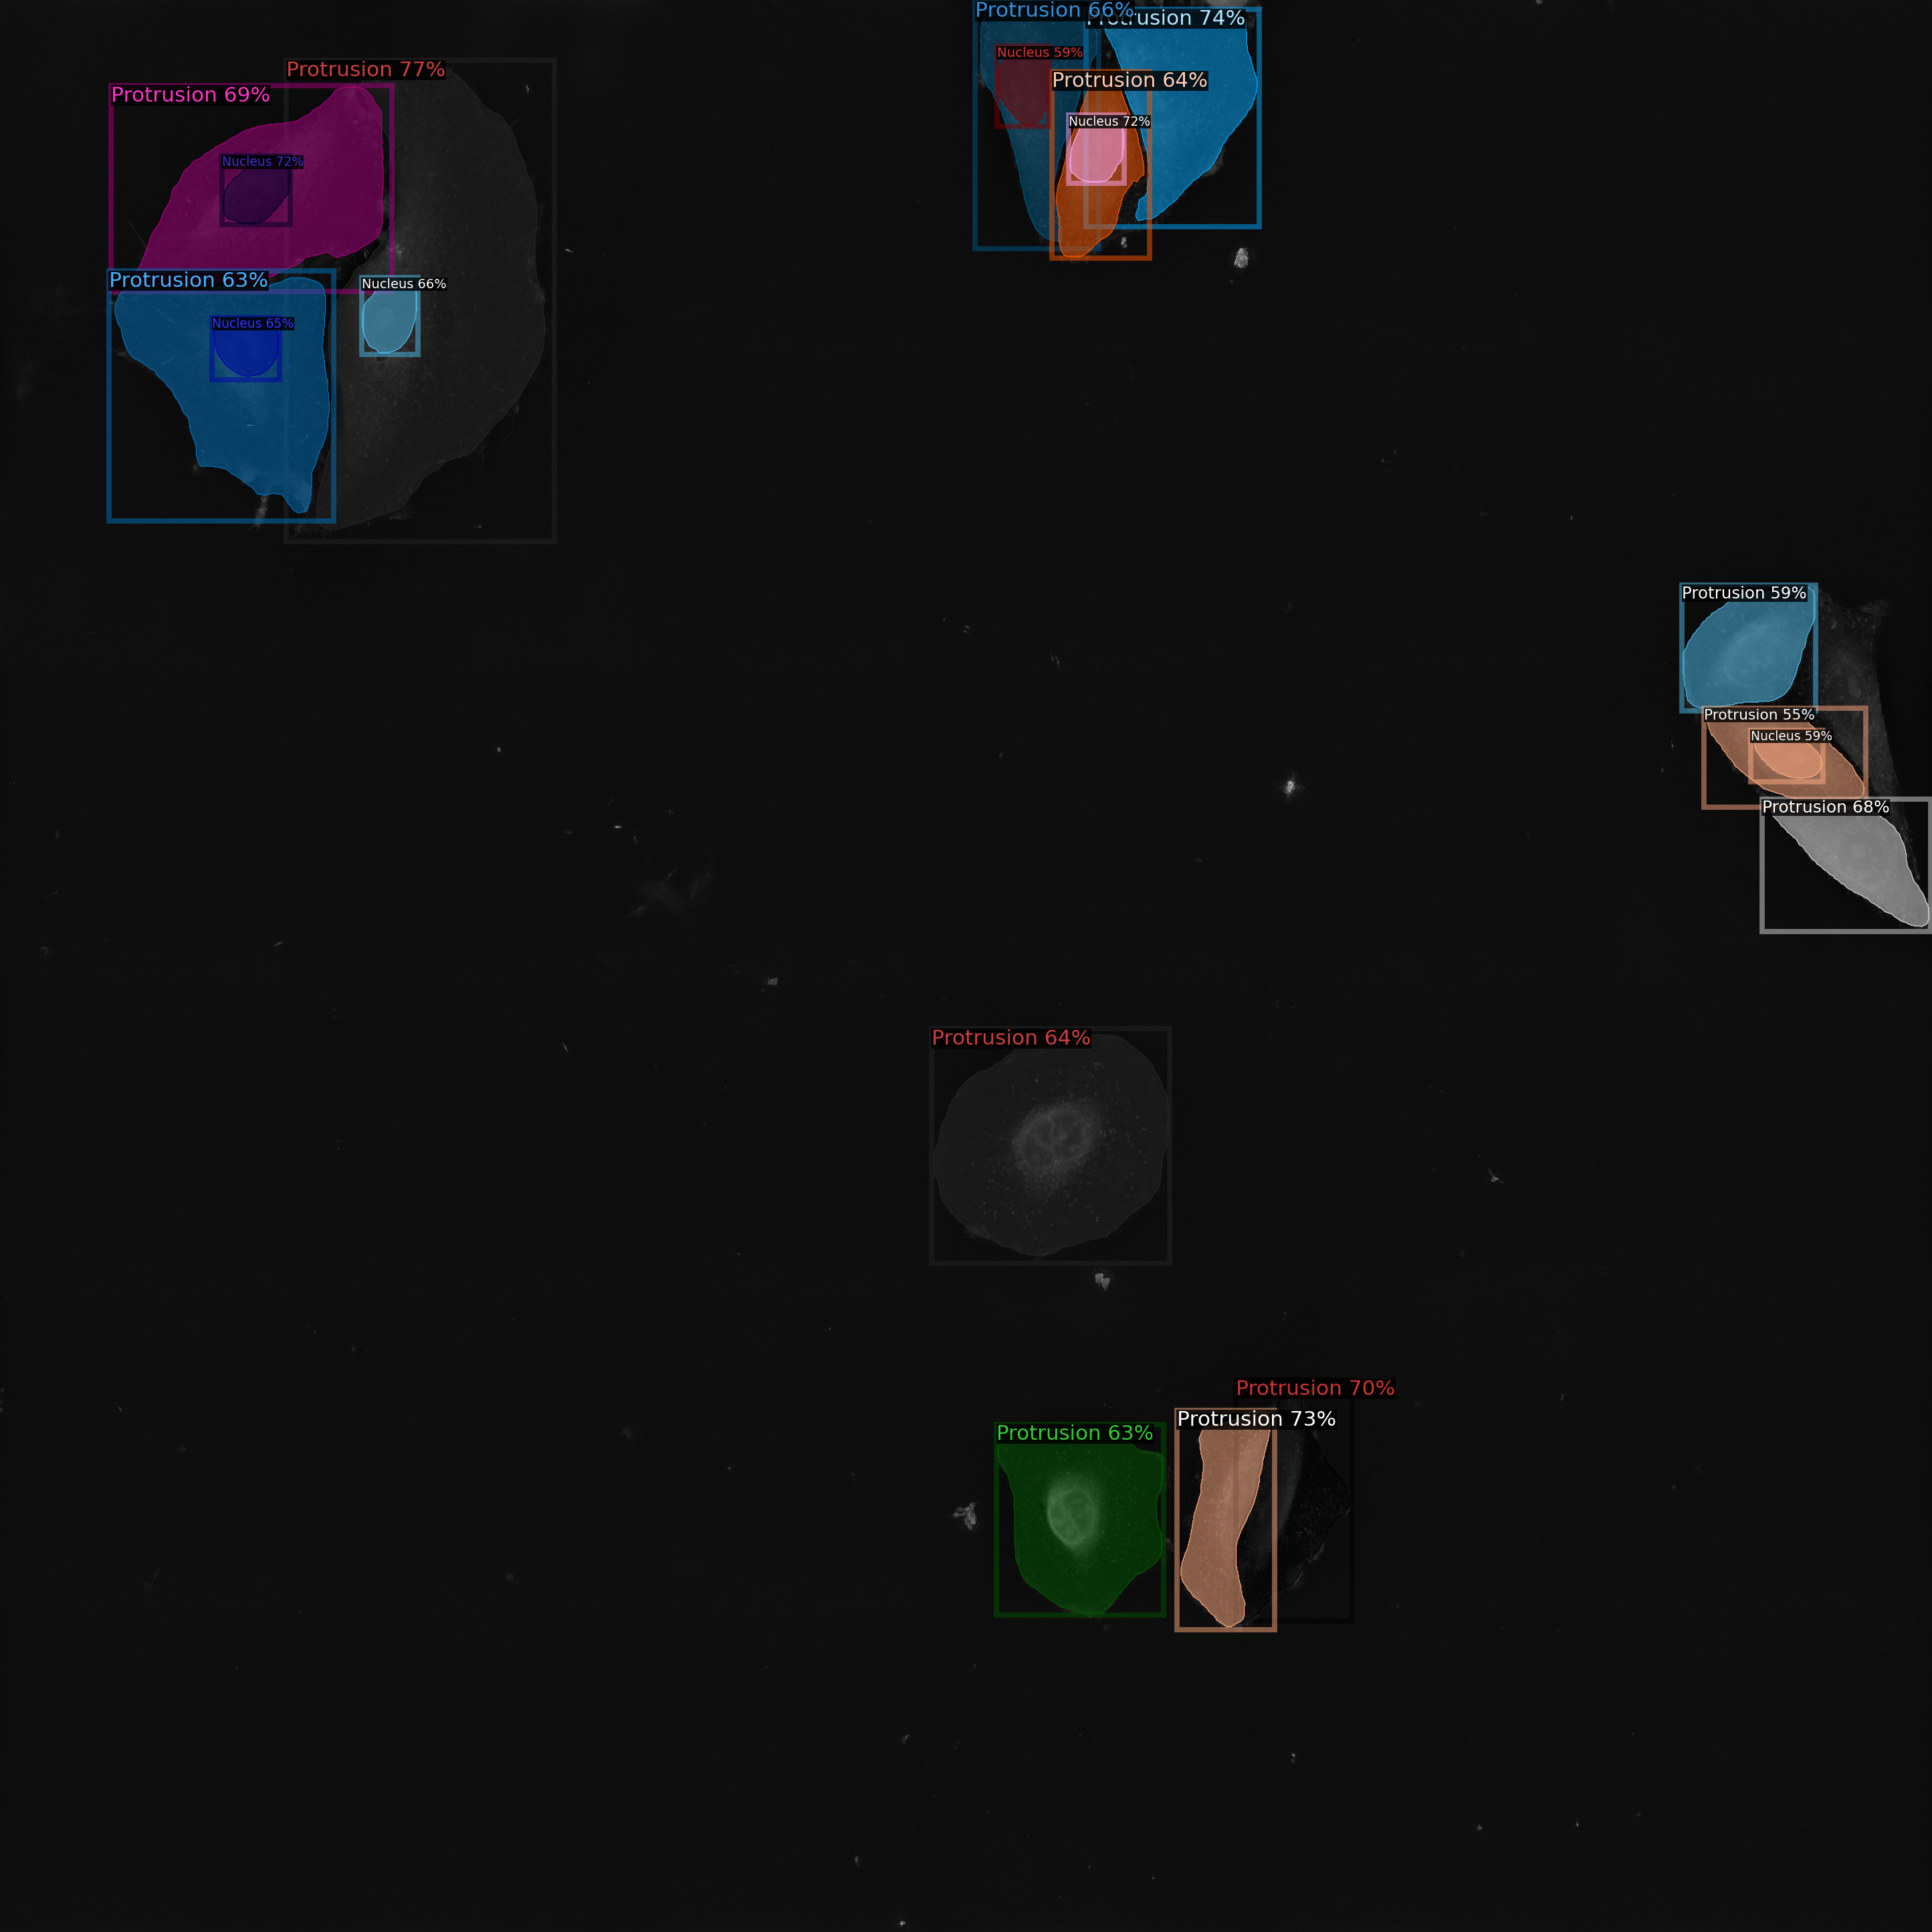

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])